* [1. Creacion de Dataset](#section1)
* [2. Filtrar](#section2)
* [3. Operaciones entre columnas](#section3)
* [4. Funciones](#section4)
* [5. Mapeo](#section5)
* [6. Reordenamos columnas](#section6)
* [7. join entre tablas](#section7)
* [8. Adicionar multiples filas desde otra tabla con Append](#section8)
* [9. Agrupar](#section9)
* [10. Pivotear una tabla](#section10)
* [11. Transponer una tabla](#section11)
* [12. Visualizacion](#section12)
* [13. BASICOS](#section13)
* [13.1 Leer un archivo csv](#section131)
* [13.2 Leer un archivo Excel](#section132)

<a id="section1"></a>
## <font color="#004D7F">1. Importando librerias</font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('ggplot')

<a id="section11"></a>
## <font color="#004D7F">1.1 Visualizacion de todas las filas y las columnas</font>

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Ejercicio KNN
Para nuestro ejercicio tomaremos 257 registros con Opiniones de usuarios sobre una app (Reviews). 
Utilizaremos 2 columnas de datos como fuente de alimento del algoritmo.
Recuerden que sólo tomaré 2 features para poder graficar en 2 dimensiones, 
PERO para un problema «en la vida real» conviene tomar más características de lo que sea que queramos resolver. 
Esto es únicamente con fines de enseñanza. Las columnas que utilizaremos serán: 
    
    
-Wordcount con la cantidad de palabras utilizadas 
-SentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo. 


Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. 
Podemos pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, 
pero no necesariamente siempre es así.

#### Cargamos los datos

In [4]:
df=pd.read_csv('Datos/reviews_sentiment.csv',sep=';')

In [5]:
df.head(2)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187


In [6]:
df.columns

Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')

In [7]:
df['wordcount'].describe()

count    257.000000
mean      11.501946
std       13.159812
min        1.000000
25%        3.000000
50%        7.000000
75%       16.000000
max      103.000000
Name: wordcount, dtype: float64

In [8]:
df['wordcount'].quantile(0.75)

16.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [10]:
df.dtypes

Review Title       object
Review Text        object
wordcount           int64
titleSentiment     object
textSentiment      object
Star Rating         int64
sentimentValue    float64
dtype: object

#### Descripcion total

In [11]:
df.describe(include='all')

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
count,257,257,257.000000,231,257,257.000000,257.000000
unique,186,241,NaN,2,2,NaN,NaN
top,Muy buena,…,NaN,positive,positive,NaN,NaN
freq,22,10,NaN,195,211,NaN,NaN
mean,NaN,NaN,11.501946,NaN,NaN,3.420233,0.383849
std,NaN,NaN,13.159812,NaN,NaN,1.409531,0.897987
min,NaN,NaN,1.000000,NaN,NaN,1.000000,-2.276469
25%,NaN,NaN,3.000000,NaN,NaN,3.000000,-0.108144
50%,NaN,NaN,7.000000,NaN,NaN,3.000000,0.264091
75%,NaN,NaN,16.000000,NaN,NaN,5.000000,0.808384


#### La variable target es "Star Rating"

In [12]:
df.columns

Index(['Review Title', 'Review Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star Rating', 'sentimentValue'],
      dtype='object')

In [13]:
df.columns=['Review_Title', 'Review_Text', 'wordcount', 'titleSentiment','textSentiment', 'Star_Rating', 'sentimentValue']

In [14]:
df.head(2)

,Review_Title,Review_Text,wordcount,titleSentiment,textSentiment,Star_Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187


#### Recordar que la variable respuesta  "Star_Rating" tiene una puntuacion de  1-5 estrellitas
- "Star_Rating" estrellas de 1-5  

In [15]:
df.groupby('Star_Rating').size()

Star_Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64

<a id="section12"></a>
## <font color="#004D7F">1.2 Cambiar de tipo de dato: numerico a texto o viseversa</font>

In [16]:
df.Star_Rating.dtype

dtype('int64')

<a id="section121"></a>
## <font color="#004D7F">1.2.1 Forma 1</font>

### LA VARIABLE "Star_Rating"

#### paso 1 :creacion de una copia

In [17]:
df2=df.copy()

#### paso 2: cambio de formato

In [18]:
df2=df2.astype({'Star_Rating':'object'})

#### paso 3: informacion

In [19]:
df2.dtypes

Review_Title       object
Review_Text        object
wordcount           int64
titleSentiment     object
textSentiment      object
Star_Rating        object
sentimentValue    float64
dtype: object

### LA VARIABLE "wordcount"

#### paso 1 :creacion de una copia

In [20]:
df3=df2.copy()

#### paso 2: cambio de formato

In [21]:
df3=df3.astype({'wordcount':'float64'})

#### paso 3: informacion

In [22]:
df3.dtypes

Review_Title       object
Review_Text        object
wordcount         float64
titleSentiment     object
textSentiment      object
Star_Rating        object
sentimentValue    float64
dtype: object

<a id="section122"></a>
## <font color="#004D7F">1.2.2 Forma 2</font>

### LA VARIABLE "Star_Rating"   //  int --> object//uso .astype(str)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_Title    257 non-null    object 
 1   Review_Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star_Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [24]:
df['Star_Rating']=df['Star_Rating'].astype(str)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_Title    257 non-null    object 
 1   Review_Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star_Rating     257 non-null    object 
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 14.2+ KB


### LA VARIABLE "wordcount" // int --> float// se uso  .astype(float)

#### paso 1 :creacion de una copia

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_Title    257 non-null    object 
 1   Review_Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star_Rating     257 non-null    object 
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 14.2+ KB


#### paso 2: cambio de formato

In [27]:
df['wordcount']=df['wordcount'].astype(float)

#### paso 3: informacion

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_Title    257 non-null    object 
 1   Review_Text     257 non-null    object 
 2   wordcount       257 non-null    float64
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star_Rating     257 non-null    object 
 6   sentimentValue  257 non-null    float64
dtypes: float64(2), object(5)
memory usage: 14.2+ KB


In [29]:
df.wordcount

0       23.0
1       20.0
2        4.0
3       17.0
4        6.0
5        8.0
6       23.0
7       16.0
8       21.0
9       13.0
10       4.0
11       9.0
12       4.0
13      23.0
14      14.0
15      20.0
16      26.0
17       7.0
18       5.0
19      22.0
20      13.0
21       7.0
22      18.0
23       4.0
24       2.0
25      29.0
26      30.0
27      63.0
28      33.0
29      34.0
30      76.0
31      34.0
32      36.0
33      63.0
34      45.0
35      27.0
36      32.0
37     103.0
38      22.0
39      20.0
40      27.0
41       9.0
42      13.0
43      15.0
44       3.0
45       6.0
46      20.0
47       3.0
48      13.0
49       9.0
50       1.0
51       1.0
52       5.0
53       2.0
54       7.0
55      15.0
56      23.0
57       4.0
58       9.0
59       3.0
60       8.0
61      10.0
62       6.0
63       3.0
64      19.0
65       1.0
66       1.0
67       1.0
68       1.0
69       1.0
70       1.0
71       7.0
72       2.0
73       5.0
74       4.0
75       4.0
76      17.0

<AxesSubplot:>

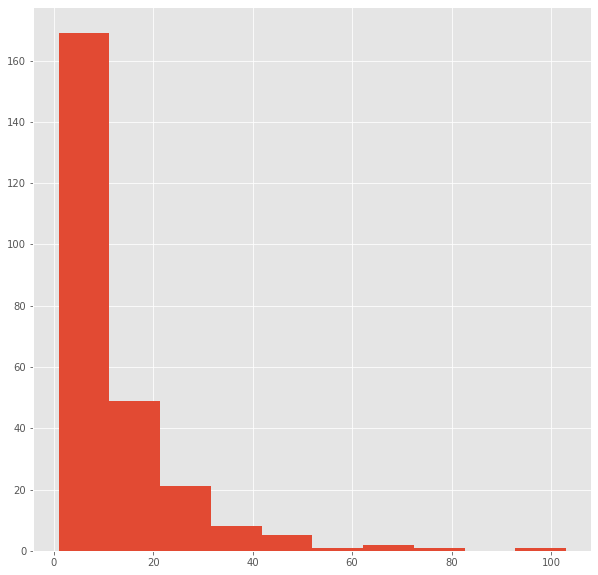

In [30]:
df.wordcount.hist()

<a id="section2"></a>
## <font color="#004D7F">2 Rapidas Visualizaciones</font>

In [31]:
df.columns

Index(['Review_Title', 'Review_Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star_Rating', 'sentimentValue'],
      dtype='object')

<AxesSubplot:xlabel='Star_Rating'>

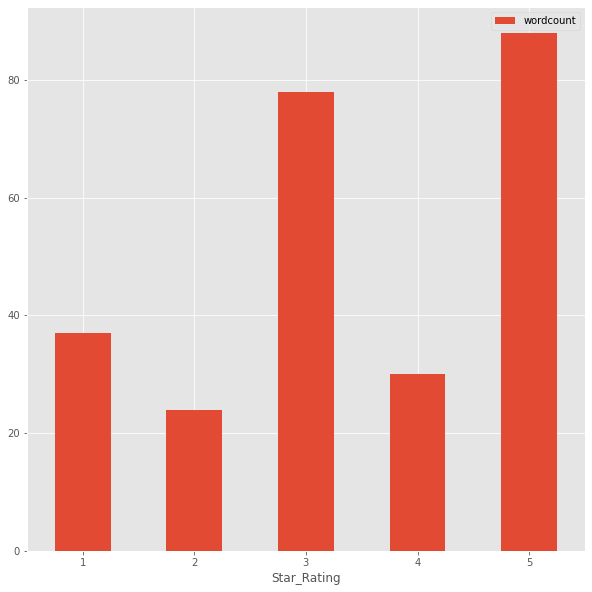

In [32]:
df.groupby('Star_Rating')['wordcount'].count().reset_index().plot.bar(x='Star_Rating',y='wordcount',rot=0)

In [33]:
df.dtypes

Review_Title       object
Review_Text        object
wordcount         float64
titleSentiment     object
textSentiment      object
Star_Rating        object
sentimentValue    float64
dtype: object

<a id="section21"></a>
## <font color="#004D7F">2.1 Particion del DataFrame</font>

In [34]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
x=df[['wordcount','sentimentValue']].values     ##numpy
y=df['Star_Rating'].values                      ##numpy

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

<a id="section211"></a>
## <font color="#004D7F">2.1.1 Escalamiento en un mismo rango</font>

In [37]:
scaler =MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
pd.DataFrame(x_train).describe()

,0,1
count,192.000000,192.000000
mean,0.143611,0.513086
std,0.173733,0.174944
min,0.000000,0.000000
25%,0.026667,0.416781
50%,0.080000,0.482369
75%,0.186667,0.607991
max,1.000000,1.000000


#### Sin escalar 

In [39]:
x[:3]

array([[23.        , -0.48638925],
       [20.        , -0.58618747],
       [ 4.        , -0.60224027]])

#### escalado

In [40]:
x_train[:3]

array([[0.01333333, 0.87899938],
       [0.82666667, 0.31422494],
       [0.06666667, 0.46798105]])

In [41]:
df.head(2)

,Review_Title,Review_Text,wordcount,titleSentiment,textSentiment,Star_Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23.0,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20.0,negative,negative,1,-0.586187


In [42]:
x[:,0]

array([ 23.,  20.,   4.,  17.,   6.,   8.,  23.,  16.,  21.,  13.,   4.,
         9.,   4.,  23.,  14.,  20.,  26.,   7.,   5.,  22.,  13.,   7.,
        18.,   4.,   2.,  29.,  30.,  63.,  33.,  34.,  76.,  34.,  36.,
        63.,  45.,  27.,  32., 103.,  22.,  20.,  27.,   9.,  13.,  15.,
         3.,   6.,  20.,   3.,  13.,   9.,   1.,   1.,   5.,   2.,   7.,
        15.,  23.,   4.,   9.,   3.,   8.,  10.,   6.,   3.,  19.,   1.,
         1.,   1.,   1.,   1.,   1.,   7.,   2.,   5.,   4.,   4.,  17.,
        23.,   4.,  13.,  12.,   6.,  14.,   7.,  28.,   5.,  23.,   7.,
         4.,  18.,  20.,   5.,   4.,  19.,  17.,  12.,   3.,   9.,   5.,
         6.,   2.,  18.,   4.,  15.,   5.,   4.,   1.,   1.,   6.,   6.,
         4.,  16.,  12.,   9.,  11.,   4.,   8.,  11.,   6.,  11.,   8.,
         1.,  10.,   1.,   3.,   5.,  22.,   2.,   2.,   1.,   7.,  38.,
        49.,  28.,  52.,  17.,  34.,  49.,  16.,  42.,  22.,   4.,  42.,
        27.,  35.,  17.,  16.,  21.,  16.,  21.,  2

#### Sin escalar 

In [43]:
x[:,0].mean(),x[:,0].std()

(11.501945525291829, 13.134184617000507)

#### Escalado

In [44]:
x_train[:,0].mean(),x_train[:,0].std()

(0.14361111111111113, 0.17327968364881124)

### Entrenaminto

In [45]:
x_train.shape

(192, 2)

#### Por defecto el ENTRENAMIENTO es 75%

In [46]:
x_train.shape[0]/len(x)   #75

0.7470817120622568

In [47]:
x_test.shape[0]/len(x)    #25%

0.2529182879377432

<a id="section3"></a>
## <font color="#004D7F">3 Creamos el Modelo KN-Vecinos mas cercanos</font>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
print(KNeighborsClassifier.__doc__)

Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'} or callable, default='uniform'
        weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        Algorithm used to compute the nearest neighbors:

 

<a id="section4"></a>
## <font color="#004D7F">4 Como obtener el mejor valor de k</font>

([<matplotlib.axis.XTick at 0x1c29f9344f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

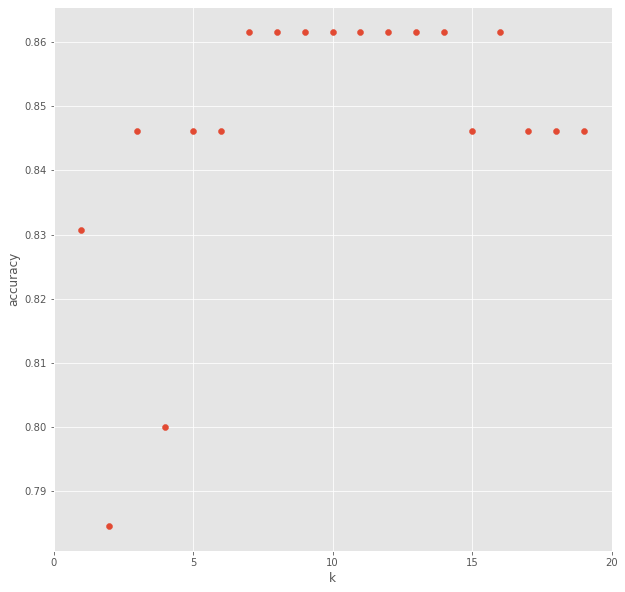

In [49]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#### Comentario:
- Se puede observar que el valor optimo es  cuando k=7 

In [50]:
valor_d_k=7

### paso 1 : modelo de kn-vecinos mas cercanos

In [51]:
knn=KNeighborsClassifier(valor_d_k)

### paso 2 : ajustar

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [53]:
print('Accuracy de k-nn clasificacion entrenamiento, 2 decimales :{:.2f}'
     .format(knn.score(x_train,y_train)))
print('Accuracy de k-nn clasificacion testeo, 2 decimales: {:.2f}'
     .format(knn.score(x_test,y_test)))

Accuracy de k-nn clasificacion entrenamiento, 2 decimales :0.90
Accuracy de k-nn clasificacion testeo, 2 decimales: 0.86


#### Comentario:
- El accuracy de testeo y el accuracy de entrenamiento son similares por lo que indica que nuestro modelo es estable.

#### Nuestro 'testeo' debe tener menos o igual accuracy que el 'entrenamiento'

In [54]:
df.columns

Index(['Review_Title', 'Review_Text', 'wordcount', 'titleSentiment',
       'textSentiment', 'Star_Rating', 'sentimentValue'],
      dtype='object')

In [55]:
df.Star_Rating.value_counts()

5    88
3    78
1    37
4    30
2    24
Name: Star_Rating, dtype: int64

<a id="section5"></a>
## <font color="#004D7F">5 Prediccion</font>

### La variable respuesta es **'Star_Rating'**

### Las variables predictoras son **''wordcount' y 'sentimentValue''**

#### Predicho: y_predicho 

In [56]:
df.head(2)

,Review_Title,Review_Text,wordcount,titleSentiment,textSentiment,Star_Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23.0,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20.0,negative,negative,1,-0.586187


#### Prediccion: y_predicho     viene de x_test

In [57]:
knn.predict(x_test)

array(['3', '1', '4', '3', '4', '5', '3', '5', '3', '3', '4', '5', '3',
       '5', '4', '3', '4', '5', '3', '3', '5', '3', '5', '3', '3', '5',
       '1', '3', '5', '2', '5', '2', '3', '5', '5', '4', '5', '1', '1',
       '5', '3', '1', '5', '5', '3', '5', '5', '3', '3', '4', '3', '3',
       '3', '3', '3', '5', '5', '1', '5', '1', '4', '3', '1', '1', '5'],
      dtype=object)

In [58]:
y_predicho=knn.predict(x_test)

In [59]:
y_predicho=pd.DataFrame(y_predicho)

In [60]:
df['y_predicho']=y_predicho
df.head(3)

,Review_Title,Review_Text,wordcount,titleSentiment,textSentiment,Star_Rating,sentimentValue,y_predicho
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23.0,negative,negative,1,-0.486389,3
1,faltan cosas,Han mejorado la apariencia pero no,20.0,negative,negative,1,-0.586187,1
2,Es muy buena lo recomiendo,Andres e puto amoooo,4.0,NaN,negative,1,-0.602240,4


#### Real : y_test

In [61]:
y_test=pd.DataFrame(y_test)

In [62]:
y_test.head(2)

,0
0,5
1,1


<a id="section51"></a>
## <font color="#004D7F">5.1 Metricas - Matrix de Confusion</font>

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test,y_predicho))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]


In [65]:
print(classification_report(y_test,y_predicho))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Al ser un algoritmo supervisado debemos contar con suficientes muestras etiquetadas 
para poder entrenar el modelo con buenos resultados. 

Este algoritmo es bastante simple y -como vimos antes- necesitamos muchos recursos de memoria y cpu 
para mantener el dataset «vivo» y evaluar nuevos puntos. 

Esto no lo hace recomendable para conjuntos de datos muy grandes

<a id="section511"></a>
## <font color="#004D7F">5.1.1 Tamaño de la figura</font>

In [66]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

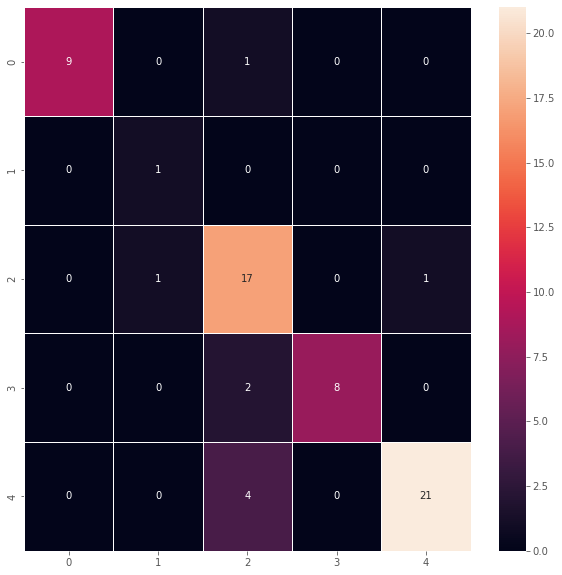

In [67]:
sns.heatmap(confusion_matrix(y_test,y_predicho),annot=True,linewidths=.5)